In [22]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.special import comb

- 内容
    - 永田靖，「サンプルサイズの決め方」，朝倉書店 の第1章「検出力とサンプルサイズの設計の意義」のメモ
    - 検定における2種類の誤りについて
    - 検出力に基づいてサンプルサイズを決めることの意義について

- 大事なこと
    - 検定では，検出力を確保することが大事．検出力を確保するためには，サンプルサイズを適切に設計することが大事である
        - 適切 とはなにか．もうちょい言語化したい

## 検定における2種類の誤り

- 第1種の誤り
- 第2種の誤り

## 検定の例

(例) あるコインがイカサマコインかどうかが問題になったとする．ここで，正しいコインとは"表と裏が出る確率が0.5であるもの",
イカサマコインとは"正しいコインではないもの"と考えることにする．このとき，「本当は正しいにもかかわらずイカサマと判断する」「本当はイカサマであるにもかかわらず正しいと判断する」という2種類の誤りがある．

このとき，$p$をコインの表が出る確率として．帰無仮説$H_0$と対立仮説$H_1$を以下のように設定する．
- $H_0$ : このコインは正しいコインである
- $H_1$ : このコインはイカサマコインである

このとき，コインを複数回投げたとき表が出た回数を$x$として，帰無仮説$H_0$の棄却方式を以下の3通り考える．
1. 6回投げて，$x=6$または$x=0$のとき$H_0$を棄却する．
2. 6回投げて，$x\ge5$または$x\le1$のとき$H_0$を棄却する．
3. 9回投げて，$x\ge8$または$x\le1$のとき$H_0$を棄却する．


第1種の誤りを犯す確率$\alpha$は，$\alpha = Pr(x=0) + Pr(x=6) = p^6 + (1-p)^6$ (正しいコインであるにもかかわらず，イカサマコインだと判断してしまう確率)．

第2種の誤りを犯す確率$\beta$は，$\beta = 1 - \{Pr(x=0) + Pr(x=6)\} = 1 - \{p^6 + (1-p)^6\}$ (イカサマコインであるが，正しいコインだと判断してしまう確率)．

In [31]:
#
# 各パターンにおける第1種の誤りを犯す確率αを比較する
#

p = 0.5
n = 6
a1 = p**n + (1-p)**n
a2 = comb(n,6) * p**6 * (1-p)**0 + comb(n,5) * p**5 * (1-p)**1 + comb(n,1) * p**1 * (1-p)**5 + comb(n,0) * p**0 * (1-p)**6
n = 9
a3 = comb(n,9) * p**9 * (1-p)**0 + comb(n,8) * p**8 * (1-p)**1 + comb(n,1) * p**1 * (1-p)**8 + comb(n,0) * p**0 * (1-p)**9

print(a1)
print(a2)
print(a3)

0.03125
0.21875
0.0390625


- 1と3は第1種の誤りを犯す確率は同程度
- 2の第1種の誤りを犯す確率は他の2つに比べて大きい

次に，3通りの棄却方式について，第2種の誤りを犯す確率$\beta$の比較を行う．

棄却方式のパターン$k$について，それぞれの第1種の誤りを犯す確率を$\alpha_k$，第2種の誤りを犯す確率を$\beta_k$とする($k=1,2,3$)．

$p$を0~1で変化させたときの$\beta_k$をプロットしてみる．ただし，$p=0.5$のときは, $\beta_k$と$\alpha_k$と一致．

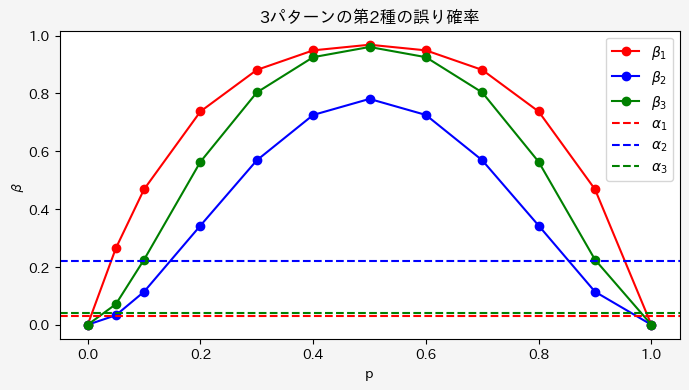

In [36]:
def beta1(n, p):
    # n回試行で確率pの第2種の誤り確率βを返す
    return 1 - (p**n + (1-p)**n)

def beta2(n, p):
    # n回試行で確率pの第2種の誤り確率βを返す
    return 1 - (comb(n,6) * p**6 * (1-p)**0 + comb(n,5) * p**5 * (1-p)**1 + comb(n,1) * p**1 * (1-p)**5 + comb(n,0) * p**0 * (1-p)**6)

def beta3(n, p):
    # n回試行で確率pの第2種の誤り確率βを返す
    return 1 - (comb(n,9) * p**9 * (1-p)**0 + comb(n,8) * p**8 * (1-p)**1 + comb(n,1) * p**1 * (1-p)**8 + comb(n,0) * p**0 * (1-p)**9)

ps = [0, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]

bs1 = [beta1(6, p) for p in ps]
bs2 = [beta2(6, p) for p in ps]
bs3 = [beta3(9, p) for p in ps]

plt.figure(figsize=(8,4), facecolor="whitesmoke")
plt.plot(ps, bs1, marker='o', label=r"$\beta_1$", color='red')
plt.plot(ps, bs2, marker='o', label=r"$\beta_2$", color='blue')
plt.plot(ps, bs3, marker='o', label=r"$\beta_3$", color='green')
plt.axhline(a1, ls='--', label=r"$\alpha_1$", color='red')
plt.axhline(a2, ls='--', label=r"$\alpha_2$", color='blue')
plt.axhline(a3, ls='--', label=r"$\alpha_3$", color='green')
# plt.axvline(0.5, c='black', ls='--')
plt.title("3パターンの第2種の誤り確率")

plt.legend(loc='upper right')
plt.xlabel('p')
plt.ylabel('β')
plt.show()

- どの方式もイカサマの程度が上がっていくと，第2種の誤りを犯す確率は下がっていく (イカサマコインであるが，正しいコインだと判断してしまう確率)．
- 方法2を見ると，第1種の誤り確率αを大きくすると，第2種の誤り確率βが小さくすることができるとわかる．
- 方法1と3はどちらも，方法2と比べてαが小さいが，方法3のほうがβが小さい．これは，サンプルサイズを増やすとβを小さくできるということがわかる．


本来$H_1$が成り立っているときに，$H_0$を正しく棄却する確率を検出力という．
これは，第2種の誤りを犯さない確率と等しく，$1-\beta$である．
計算上は，第1種の誤りを犯す確率$\alpha$も検出力$1-\beta$も，どちらも，$H_0$を棄却する確率である．
違いは，$H_0$の下で計算するか，$H_1$の下で計算するかどうかである．


パラメータを横軸に取り，検出力を縦軸にとった曲線を検出力曲線という(前の図形のがβなのでちょうどひっくり返した形になる)．

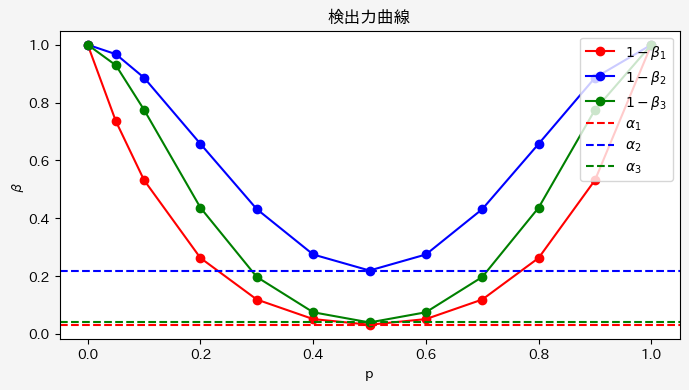

In [38]:
bs1 = [1- beta1(6, p) for p in ps]
bs2 = [1- beta2(6, p) for p in ps]
bs3 = [1- beta3(9, p) for p in ps]

plt.figure(figsize=(8,4), facecolor="whitesmoke")
plt.plot(ps, bs1, marker='o', label=r"$1- \beta_1$", color='red')
plt.plot(ps, bs2, marker='o', label=r"$1- \beta_2$", color='blue')
plt.plot(ps, bs3, marker='o', label=r"$1- \beta_3$", color='green')
plt.axhline(a1, ls='--', label=r"$\alpha_1$", color='red')
plt.axhline(a2, ls='--', label=r"$\alpha_2$", color='blue')
plt.axhline(a3, ls='--', label=r"$\alpha_3$", color='green')
# plt.axvline(0.5, c='black', ls='--')
plt.title("検出力曲線")

plt.legend(loc='upper right')
plt.xlabel('p')
plt.ylabel('β')
plt.show()

- どの方式でも，イカサマの程度が大きい(p=0.5)では，検出力が大きい
- αを小さく設定できたとしても，検出力が小さくなることがある
    - これは，$H_0$を棄却できるときは，$H_1$を正しいといえるが，$H_0$を棄却できないときは，$H_1$の内容を結論として断言できるわけではないことを示す．
    - つまり，帰無仮説を受容したとしても，「コインは正しい」とは言えず，「コインはイカサマではない可能性が高い」くらいの結論しか出せない．
    - $H_0$の内容を断定するためには，検出力が大きいことを示さなくてはならない

- ぴったりp=0.5を検証することは困難だから，ある程度の誤差を$\Delta$として，$p > 0.5 L \Delta$のときには，正しく判断をできるように検出力を確保したい．


**対立仮説を否定するためには検出力が大きいことが必要である．サンプルサイズを大きくすれば，検出力を大きくすることができるが，現実的にはサンプルサイズを増やすことは困難な状況が多い．(あと，単に増やせばいいの？って問題もあるし)**

- 一般に帰無仮説はサンプルサイズを増やすと棄却されやすくなるらしいが，これは良いのだろうか？
    - 例えば，施策に効果があったかを検定するとき，施策に効果がなかった VS 施策に効果があった を検定する．このとき，サンプルを増やすことで，施策に効果がなかったという帰無仮説を棄却することが果たして本質的に意味があるのかという問題があると思った．これはもうちょい勉強が進んだらちゃんと調べる(TODO)